In [36]:
pip install seaborn

In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 

In [2]:
from pyspark.sql import SparkSession

In [6]:
if 'spark' in locals():
    spark.stop()

In [28]:
spark = SparkSession.builder \
    .appName("CSV with Hadoop") \
    .master("spark://172.20.10.3:7077") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()

In [30]:
df = spark.read.option("header", "true").csv("hdfs://localhost:9000/data/weatherAUS.csv")
df.show()

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|         NA|      NA|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|      NA|   16.9|   21.8|       No|          No|
|2008-12-02|

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
weather_data = df.toPandas()
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,...,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0,NA,NA,WNW,44,NNW,...,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0,NA,NA,WSW,46,W,...,38,30,1007.6,1008.7,NA,2,21,23.2,No,No
3,2008-12-04,Albury,9.2,28,0,NA,NA,NE,24,SE,...,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1,NA,NA,W,41,ENE,...,82,33,1010.8,1006,7,8,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,...,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25,0,NA,NA,W,50,SW,...,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0,NA,NA,W,35,SSE,...,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0,NA,NA,NNW,80,SE,...,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NA,NA,W,28,S,...,58,27,1007,1005.7,NA,NA,20.1,28.2,Yes,No


In [44]:
type(weather_data)

pandas.core.frame.DataFrame

In [11]:
# Define a list of placeholder representations for missing values
placeholders = ['NA', '', 'null']  # Add any other placeholders as needed

# Replace placeholder values with NaN across all columns
for column in weather_data.columns:
    # Replace placeholders with NaN
    weather_data[column] = weather_data[column].replace(placeholders, pd.NA)

# After transformations, check for remaining NULLs
null_counts = weather_data.isnull().sum()

# Print NULL counts to confirm changes
for column in weather_data.columns:
    print(f"NULL Count in {column}: {null_counts[column]}")

NULL Count in Date: 0
NULL Count in Location: 0
NULL Count in MinTemp: 1485
NULL Count in MaxTemp: 1261
NULL Count in Rainfall: 3261
NULL Count in Evaporation: 62790
NULL Count in Sunshine: 69835
NULL Count in WindGustDir: 10326
NULL Count in WindGustSpeed: 10263
NULL Count in WindDir9am: 10566
NULL Count in WindDir3pm: 4228
NULL Count in WindSpeed9am: 1767
NULL Count in WindSpeed3pm: 3062
NULL Count in Humidity9am: 2654
NULL Count in Humidity3pm: 4507
NULL Count in Pressure9am: 15065
NULL Count in Pressure3pm: 15028
NULL Count in Cloud9am: 55888
NULL Count in Cloud3pm: 59358
NULL Count in Temp9am: 1767
NULL Count in Temp3pm: 3609
NULL Count in RainToday: 3261
NULL Count in RainTomorrow: 3267


<Figure size 1200x600 with 0 Axes>

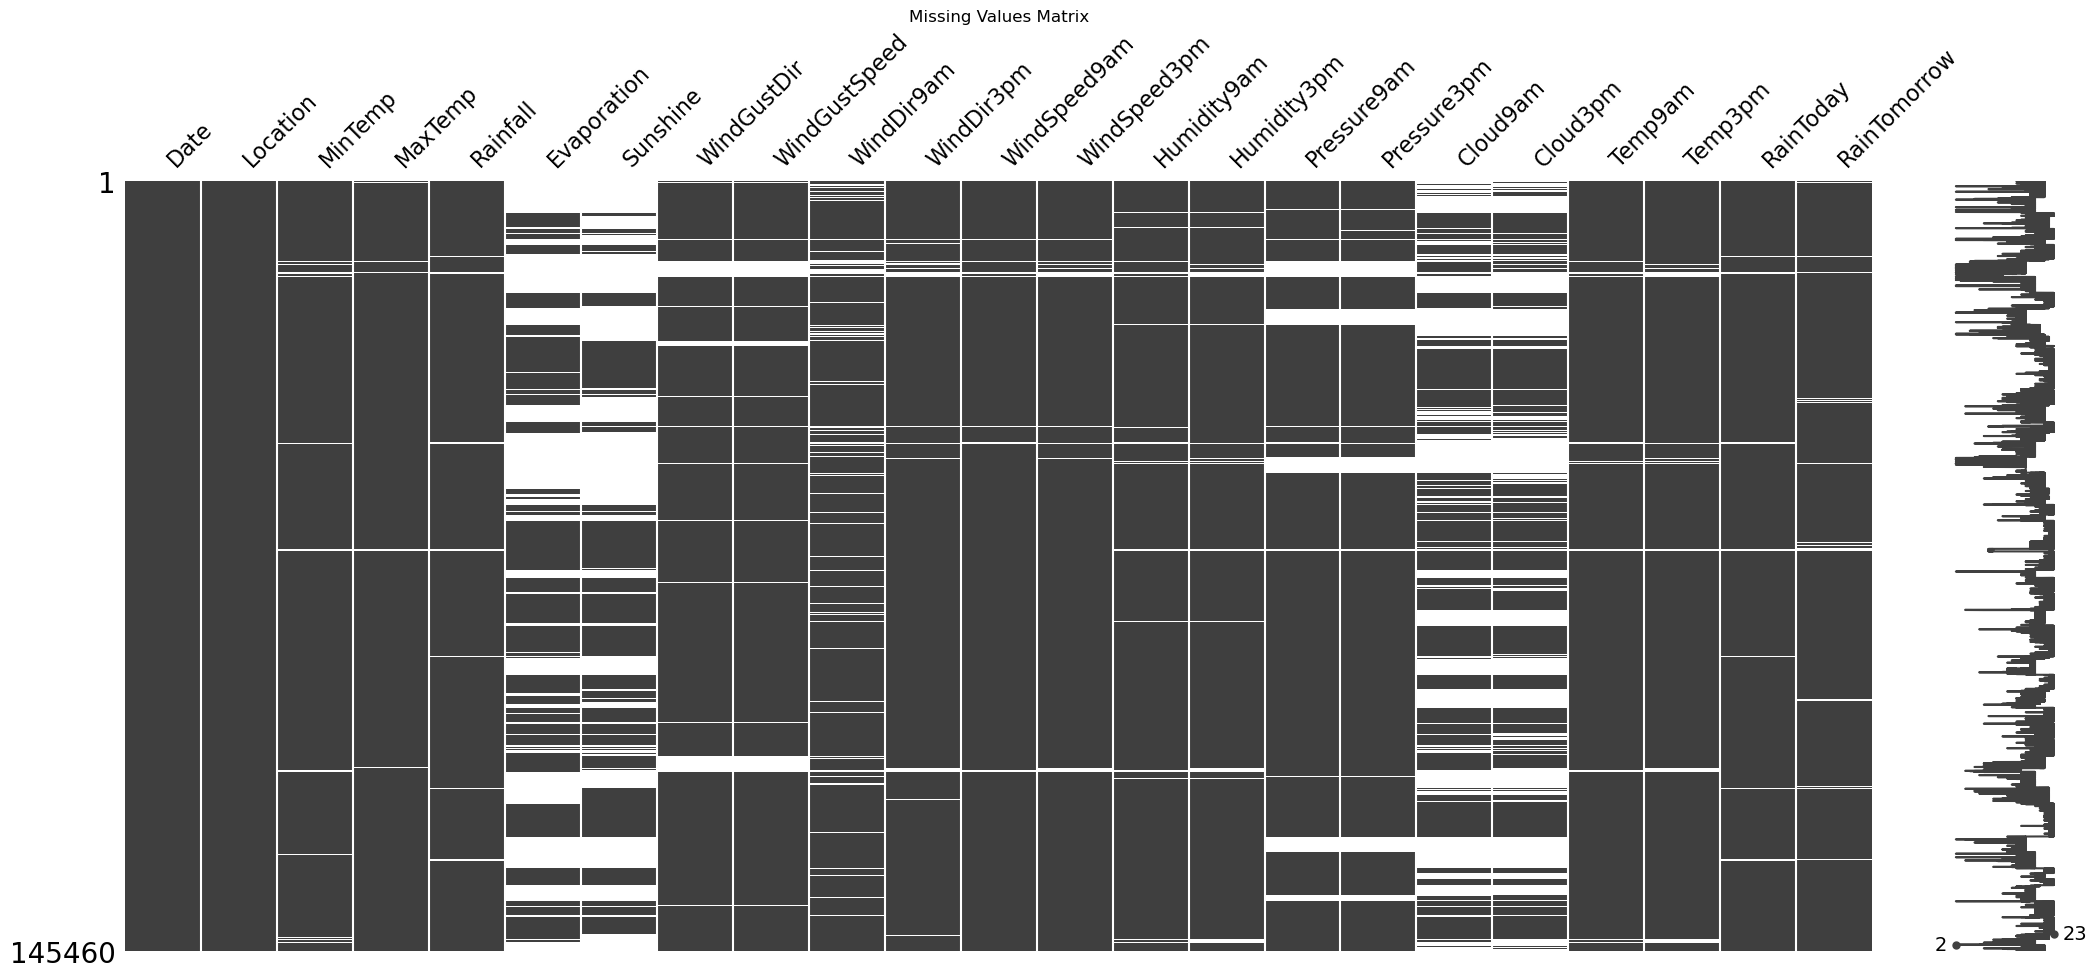

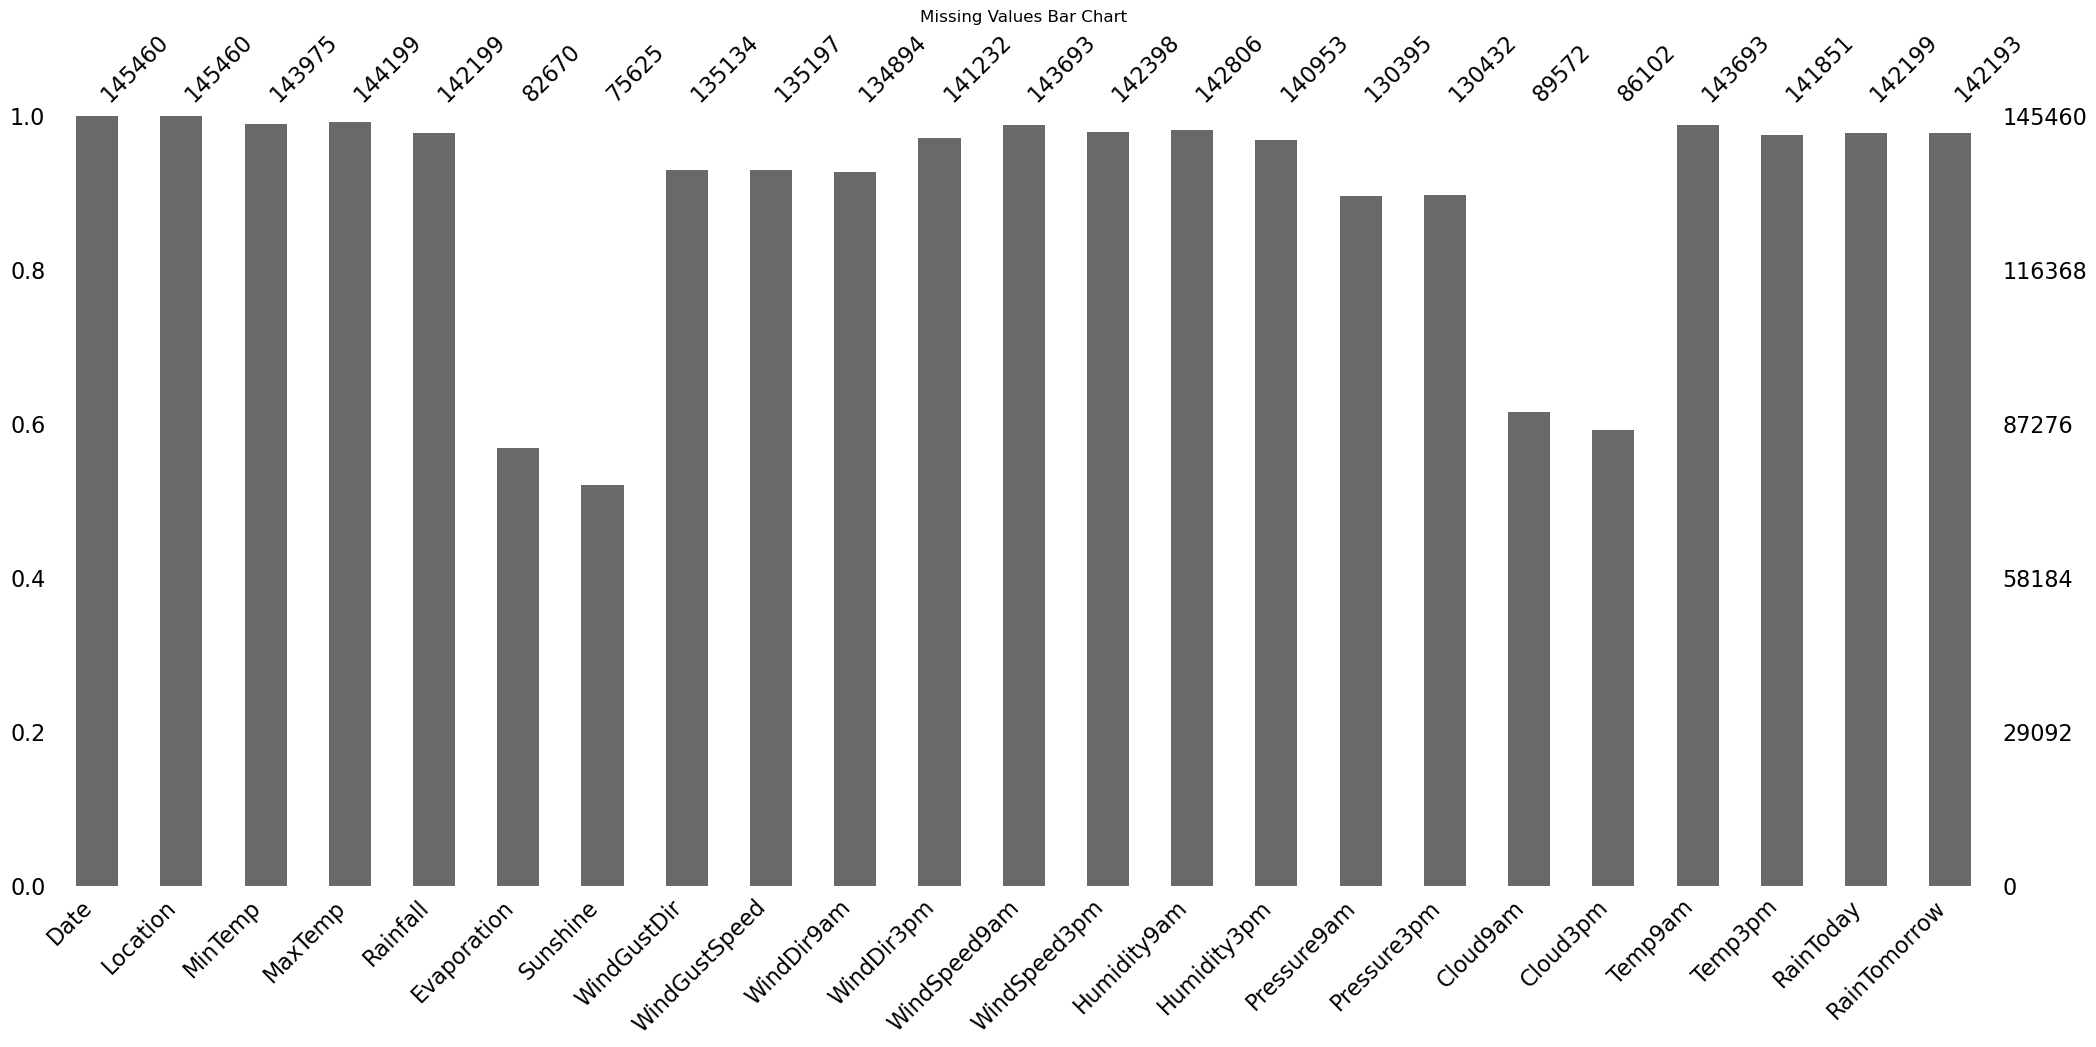

In [46]:
#Visualise Missing Values
plt.figure(figsize=(12, 6))
msno.matrix(weather_data)
plt.title('Missing Values Matrix')
plt.show()
#Visualise Missing Values
plt.figure(figsize=(12, 6))
msno.bar(weather_data)
plt.title('Missing Values Bar Chart')
plt.show()

In [12]:
weather_data_pd = weather_data.dropna()

In [13]:
weather_data_pd.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
all_column_types = weather_data_pd.dtypes
print(all_column_types)

Date             object
Location         object
MinTemp          object
MaxTemp          object
Rainfall         object
Evaporation      object
Sunshine         object
WindGustDir      object
WindGustSpeed    object
WindDir9am       object
WindDir3pm       object
WindSpeed9am     object
WindSpeed3pm     object
Humidity9am      object
Humidity3pm      object
Pressure9am      object
Pressure3pm      object
Cloud9am         object
Cloud3pm         object
Temp9am          object
Temp3pm          object
RainToday        object
RainTomorrow     object
dtype: object


In [15]:
weather_data_pd.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420,56420,56420,56420,56420,56420,56420,56420,56420,56420,...,56420,56420,56420,56420,56420,56420,56420,56420,56420,56420
unique,3416,26,348,395,410,259,145,16,61,16,...,101,101,504,507,9,10,383,393,2,2
top,2010-11-16,Darwin,13,19.6,0,4,0,E,35,N,...,68,52,1016.4,1014.8,7,7,16.6,18.4,No,No
freq,25,3062,349,303,36709,2263,1658,4516,3965,4967,...,1314,1250,382,351,14394,13809,343,329,43958,43993


In [16]:
weather_data_pd = pd.get_dummies(weather_data_pd, columns=['Location', 'RainToday'], drop_first=True)

In [17]:
# Convert target variable to numerical (0 for 'No', 1 for 'Yes')
label_encoder = LabelEncoder()
weather_data_pd['RainTomorrow'] = label_encoder.fit_transform(weather_data_pd['RainTomorrow'])

In [18]:
X = weather_data_pd.drop(['WindGustDir','RainTomorrow', 'Date','WindDir3pm','WindDir9am'], axis=1)
y = weather_data_pd['RainTomorrow'] 

In [19]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the Logistic Regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
model.score(X_test, y_test)*100

86.09535625664658

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.91      8799\n           1       0.77      0.52      0.62      2485\n\n    accuracy                           0.86     11284\n   macro avg       0.83      0.74      0.77     11284\nweighted avg       0.85      0.86      0.85     11284\n'

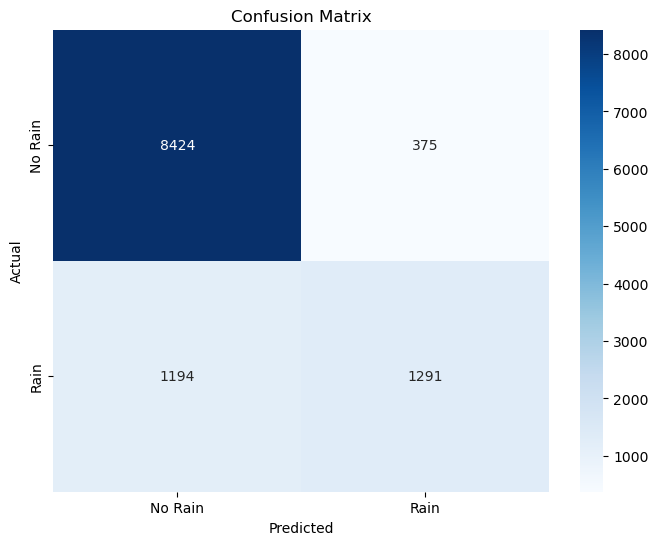

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['No Rain', 'Rain'], 
             yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()